In [73]:
from bs4 import BeautifulSoup
import requests
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import seaborn as sns

In [30]:
# defining scraping function
# returns a list of all row tags tags in the specific body tag where my data is located
def Scrape(team):
    chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
    os.environ["webdriver.chrome.driver"] = chromedriver
    url = 'https://www.baseball-reference.com/teams/{}/2018-schedule-scores.shtml'.format(team)
    
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, "lxml")
        
    driver = webdriver.Chrome(chromedriver)
    driver.get(url)

    # getting baseball reference web page 
    driver.page_source[:]
    # defining a soup object 
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    table = soup.find_all('tbody')
    # fun fact, my cat changed the 37 to 31 and it messed up the indexing on the function below
    # so i had to go back through the html code and locate which body tag had my data in it 
    D1 = table[37]
    D = D1.find_all('tr')
    return D

In [31]:
# getting totals for each team 
# returns a list of dictionaries 
def get_Totals(D2):
    
    collection = {}
    Totals = []
    win = 0
    loss = 0
    for i in range(2,21):
        D4 = D2[i].find_all('td')
        for j in range(3):
            if j == 0:
                team = D4[j].text
            if j == 1:
                win = int(D4[j].text)
            if j == 2:
                loss = int(D4[j].text)
            t = win + loss
        collection[team] = t 
    Totals.append(collection)
    return Totals

In [32]:
# setting team acronyms for my website 
team = ['CLE','BAL','BOS','CHC','CHW','CIN','DET','HOU','KCR','LAA','MIL','MIN','NYY',"OAK",'PIT','SEA','STL','TBR','TOR',
        'ARI','SFG','TEX','WSN','PHI','SDP','NYM','MIA','LAD','COL','ATL']
teams = sorted(team)
print(teams)

['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBR', 'TEX', 'TOR', 'WSN']


In [33]:
FINAL = []
for i in range(len(teams)):
    D2 = Scrape(teams[i])
    TOTALS = get_Totals(D2)
    FINAL.append(TOTALS)



In [96]:
# teams the atlanta braves played against and how many times 
# 0-30 gives the breakdown of each team and who and how many times they played a particular team
# iterate over the first index to see, keeping second index constant 
FINAL[1][0]

{'ARI': 7,
 'BAL': 3,
 'BOS': 6,
 'CHC': 6,
 'CIN': 7,
 'COL': 7,
 'LAD': 7,
 'MIA': 19,
 'MIL': 7,
 'NYM': 19,
 'NYY': 3,
 'PHI': 19,
 'PIT': 6,
 'SDP': 7,
 'SFG': 6,
 'STL': 6,
 'TBR': 4,
 'TOR': 4,
 'WSN': 19}

In [209]:
import pandas as pd 

In [50]:
df = pd.read_csv('UZRTEAM.csv')

In [51]:
UZR = df[['Team','UZR']]

In [52]:
# imputed team uzr manually 
uzr = {'OAK': 39.9, 'STL': 32.8,'CLE':32.9, 'PHI': 21.1, 'ARI': 21.0, 'KCR': 20.3 , 'LAA':26.8, 'BOS':10.8, 'HOU':14.9,
       'CHC':11.9, 'SDP': 3.2, 'SFG':5.6,'MIL':10.0, 'NYY':2.7, 'WSN': 2.9, 'MIA':-1.0, 'TBR': -2.1, 'LAD':-2.0,'COL':-10.8,
       'CIN':-1.5,'TEX':-11.1,'ATL':-10.3,'MIN':-9.9,'TOR':-24.9,'CHW':-19.2,'NYM':-12.8,'DET':-27.7, 'SEA': -29.5, 'BAL':29.5,
       'PIT':-54.0}

uzr_score = []
for item in uzr.items():
    uzr_score.append(item[1])

uzr_score

[39.9,
 32.8,
 32.9,
 21.1,
 21.0,
 20.3,
 26.8,
 10.8,
 14.9,
 11.9,
 3.2,
 5.6,
 10.0,
 2.7,
 2.9,
 -1.0,
 -2.1,
 -2.0,
 -10.8,
 -1.5,
 -11.1,
 -10.3,
 -9.9,
 -24.9,
 -19.2,
 -12.8,
 -27.7,
 -29.5,
 29.5,
 -54.0]

In [97]:
counts = []
for_each = {}
for i in range(30):
    for item in FINAL[i][0].items():
        score = uzr[item[0]]*item[1]
        counts.append(score)
    
    for_each[teams[i]] = counts 
    counts = []
    
        
        

In [98]:
# Example: Arizona(ARI) played 162 games against various teams , each element in the value list represents 
# the combined uzr for each opponent arizona played . this is repeated for every team . stored in dictionary 
# 'for_each'
for_each

{'ARI': [-72.10000000000001,
  83.3,
  -9.0,
  -205.20000000000002,
  89.4,
  107.2,
  -38.0,
  -7.0,
  60.0,
  -89.60000000000001,
  119.69999999999999,
  126.60000000000001,
  -378.0,
  60.800000000000004,
  -88.5,
  106.39999999999999,
  196.79999999999998,
  -44.4,
  20.3],
 'ATL': [147.0,
  88.5,
  64.80000000000001,
  71.4,
  -10.5,
  -75.60000000000001,
  -14.0,
  -19.0,
  70.0,
  -243.20000000000002,
  8.100000000000001,
  400.90000000000003,
  -324.0,
  22.400000000000002,
  33.599999999999994,
  196.79999999999998,
  -8.4,
  -99.6,
  55.1],
 'BAL': [-30.900000000000002,
  205.20000000000002,
  -134.4,
  230.29999999999998,
  -166.2,
  104.3,
  121.80000000000001,
  160.8,
  -3.0,
  -69.3,
  -51.2,
  51.300000000000004,
  239.39999999999998,
  84.4,
  -206.5,
  -39.9,
  -77.7,
  -473.09999999999997,
  17.4],
 'BOS': [-61.800000000000004,
  560.5,
  -134.4,
  230.29999999999998,
  -166.2,
  104.3,
  121.80000000000001,
  160.8,
  -4.0,
  -69.3,
  -38.400000000000006,
  51.30000

In [55]:
UZR_SCORE = {}
# calculating average uzr for each team 
for item in for_each.items():
    UZR_SCORE[item[0]] = sum(item[1])/20

In [56]:
# average uzr per team, to use as defensive feature 
UZR_SCORE

{'ARI': 1.9349999999999965,
 'ATL': 18.215000000000003,
 'BAL': -1.8649999999999967,
 'BOS': 14.510000000000002,
 'CHC': -9.09,
 'CHW': 38.065,
 'CIN': 10.454999999999993,
 'CLE': -16.649999999999995,
 'COL': 32.035000000000004,
 'DET': 32.489999999999995,
 'HOU': 36.685,
 'KCR': 1.185000000000001,
 'LAA': 16.794999999999998,
 'LAD': 32.05,
 'MIA': 13.684999999999999,
 'MIL': -5.524999999999999,
 'MIN': 28.785000000000004,
 'NYM': 19.145,
 'NYY': 22.985,
 'OAK': 5.040000000000008,
 'PHI': -16.095000000000006,
 'PIT': 51.55999999999999,
 'SDP': 16.74,
 'SEA': 72.99,
 'SFG': 21.769999999999996,
 'STL': -24.800000000000004,
 'TBR': 31.005000000000013,
 'TEX': 58.01500000000001,
 'TOR': 55.205,
 'WSN': 8.834999999999997}

In [88]:
# reading in csv so i can can premliminary results quicker 
DF = pd.read_csv('Players2018.csv')

In [89]:
# selecting features 
BABIP = DF[['Name','Team','BABIP','LD%','GB%','Cent%','Oppo%','Med%']]

In [90]:
BABIP.head()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [91]:
# converting all strings to floats and percents into decimals 
BABIP['Cent%'] = BABIP['Cent%'].str.strip('%').astype('float') / 100 
BABIP['Oppo%'] = BABIP['Oppo%'].str.strip('%').astype('float') / 100
BABIP['GB%'] = BABIP['GB%'].str.strip('%').astype('float') / 100
BABIP['Med%'] = BABIP['Med%'].str.strip('%').astype('float') / 100
BABIP['BABIP'] = BABIP['BABIP'].astype('float')

<ipython-input-91-6a662b518d8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BABIP['Cent%'] = BABIP['Cent%'].str.strip('%').astype('float') / 100
<ipython-input-91-6a662b518d8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BABIP['Oppo%'] = BABIP['Oppo%'].str.strip('%').astype('float') / 100
<ipython-input-91-6a662b518d8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [62]:
#BABIP['LD%'] = BABIP['LD%'].str.strip('%').astype('float') / 100
BABIP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    448 non-null    object 
 1   Team    448 non-null    object 
 2   BABIP   448 non-null    float64
 3   LD%     448 non-null    float64
 4   GB%     448 non-null    float64
 5   Cent%   448 non-null    float64
 6   Oppo%   448 non-null    float64
 7   Med%    448 non-null    float64
 8   AVGUZR  448 non-null    float64
dtypes: float64(7), object(2)
memory usage: 31.6+ KB


In [99]:
T = list(BABIP['Team'])
uZr = []
for i in range(len(T)):
    if T[i] == '- - -':
        uZr.append(0)
    else:
        uZr.append(UZR_SCORE[T[i]])
    

In [100]:
#U_zr = {'AVG_UZR':uZr}

In [101]:
BABIP['AVGUZR'] = uZr

<ipython-input-101-5d147ef3c004>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BABIP['AVGUZR'] = uZr


In [102]:
# features and target with AVGUZR added
BABIP.head()

,Name,Team,BABIP,LD%,GB%,Cent%,Oppo%,Med%,AVGUZR
0,Luke Voit,- - -,0.365,28.0%,0.350,0.380,0.210,0.440,0.000
1,Christian Yelich,MIL,0.373,24.7%,0.518,0.381,0.270,0.379,-5.525
2,Shohei Ohtani,LAA,0.350,23.6%,0.436,0.373,0.258,0.467,16.795
3,Franmil Reyes,SDP,0.345,21.0%,0.492,0.431,0.232,0.409,16.740
4,J.D. Martinez,BOS,0.375,22.6%,0.435,0.309,0.314,0.442,14.510


In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

,Name,Team,BABIP,LD%,GB%,Cent%,Oppo%,Med%,AVGUZR
0,Luke Voit,- - -,0.365,0.280,0.350,0.380,0.210,0.440,0.000
1,Christian Yelich,MIL,0.373,0.247,0.518,0.381,0.270,0.379,-5.525
2,Shohei Ohtani,LAA,0.350,0.236,0.436,0.373,0.258,0.467,16.795
3,Franmil Reyes,SDP,0.345,0.210,0.492,0.431,0.232,0.409,16.740
4,J.D. Martinez,BOS,0.375,0.226,0.435,0.309,0.314,0.442,14.510


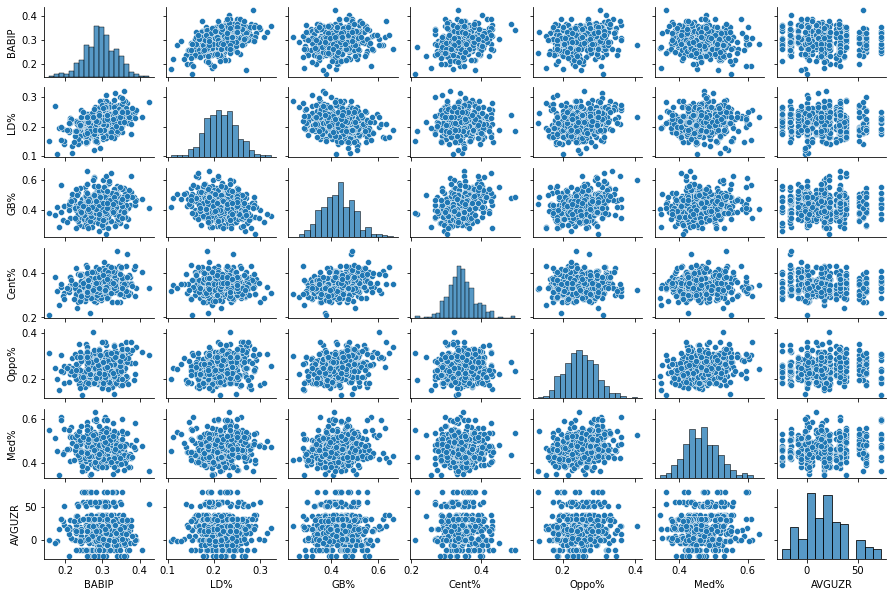

In [75]:
# pair plot without taking avguzr = 0 oout of data set 
sns.pairplot(BABIP, height=1.2, aspect=1.5);
BABIP.head()

In [76]:
#removing all AVGUZR values that are equal to zero
mask = (BABIP['AVGUZR'] != 0)

In [77]:
BABIPNEW = BABIP[mask]

In [80]:
BABIPNEW

,Name,Team,BABIP,LD%,GB%,Cent%,Oppo%,Med%,AVGUZR
1,Christian Yelich,MIL,0.373,0.247,0.518,0.381,0.270,0.379,-5.525
2,Shohei Ohtani,LAA,0.350,0.236,0.436,0.373,0.258,0.467,16.795
3,Franmil Reyes,SDP,0.345,0.210,0.492,0.431,0.232,0.409,16.740
4,J.D. Martinez,BOS,0.375,0.226,0.435,0.309,0.314,0.442,14.510
5,Max Muncy,LAD,0.299,0.208,0.343,0.312,0.241,0.402,32.050
...,...,...,...,...,...,...,...,...,...
443,Charlie Tilson,CHW,0.322,0.165,0.647,0.427,0.315,0.404,38.065
444,Kelby Tomlinson,SFG,0.276,0.235,0.602,0.321,0.406,0.528,21.770
445,Carlos Tocci,TEX,0.329,0.228,0.443,0.352,0.227,0.523,58.015
446,Magneuris Sierra,MIA,0.259,0.234,0.574,0.315,0.297,0.550,13.685


In [81]:
BABIPNEW.reset_index(inplace=True)

In [82]:
BABIPNEW
del BABIPNEW['index']

In [83]:
BABIPNEW.sample(50)

,Name,Team,BABIP,LD%,GB%,Cent%,Oppo%,Med%,AVGUZR
60,Stephen Piscotty,OAK,0.290,0.222,0.449,0.368,0.238,0.446,5.040
189,Adrian Beltre,TEX,0.312,0.258,0.380,0.328,0.284,0.435,58.015
301,Wilmer Flores,NYM,0.269,0.193,0.360,0.328,0.276,0.431,19.145
156,Paul DeJong,STL,0.288,0.242,0.318,0.283,0.261,0.428,-24.800
400,Grayson Greiner,DET,0.313,0.239,0.448,0.373,0.254,0.463,32.490
281,Mason Williams,CIN,0.370,0.253,0.484,0.302,0.292,0.427,10.455
288,Josh Harrison,PIT,0.286,0.250,0.377,0.300,0.240,0.488,51.560
312,Ehire Adrianza,MIN,0.313,0.254,0.375,0.332,0.216,0.463,28.785
318,Guillermo Heredia,SEA,0.270,0.233,0.432,0.289,0.309,0.510,72.990
212,Jed Lowrie,OAK,0.304,0.234,0.332,0.325,0.253,0.465,5.040


In [84]:
# correlation with avguzr = 0 removed 
BABIPNEW.corr()

,BABIP,LD%,GB%,Cent%,Oppo%,Med%,AVGUZR
BABIP,1.000000,0.430947,0.132396,0.196688,0.226997,-0.116401,-0.032860
LD%,0.430947,1.000000,-0.261917,-0.002338,0.222697,0.079672,-0.046812
GB%,0.132396,-0.261917,1.000000,0.346663,0.304529,0.147184,0.006679
Cent%,0.196688,-0.002338,0.346663,1.000000,0.074278,0.049207,-0.119503
Oppo%,0.226997,0.222697,0.304529,0.074278,1.000000,0.230854,0.028322
Med%,-0.116401,0.079672,0.147184,0.049207,0.230854,1.000000,0.133235
AVGUZR,-0.032860,-0.046812,0.006679,-0.119503,0.028322,0.133235,1.000000


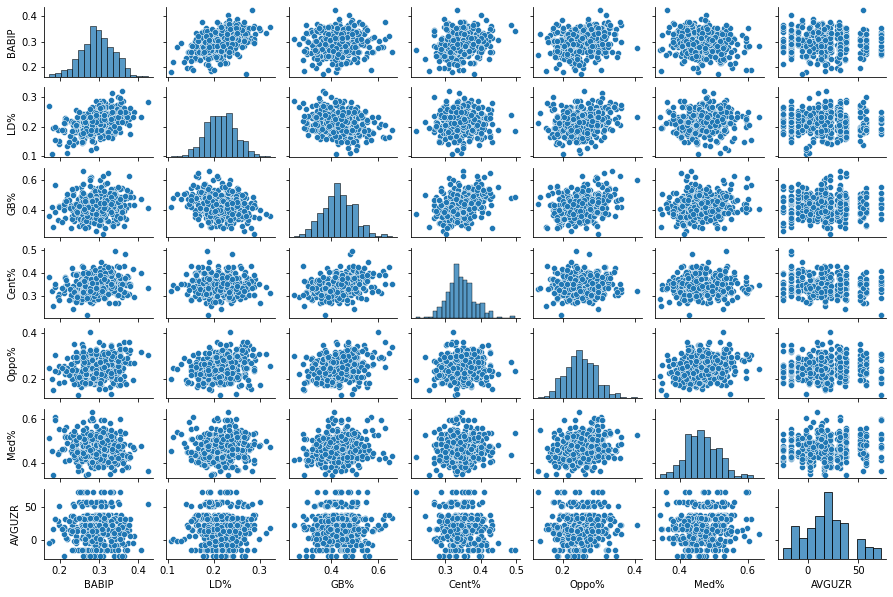

In [85]:
sns.pairplot(BABIPNEW, height=1.2, aspect=1.5);

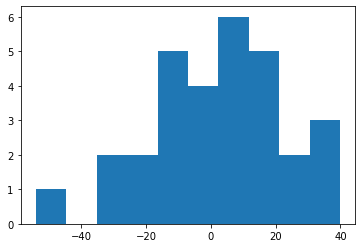

In [257]:
plt.hist(uzr_score);